## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [9]:
# Checking the number of mice.
study_results_path
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
merge_data
number_mouse = merge_data["Mouse ID"].count
number_mouse

<bound method Series.count of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [11]:
duplicate_mouse = merge_data[merge_data.duplicated(['Mouse ID','Timepoint'])]

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

mouseID_remove_duplicates = merge_data[merge_data['Mouse ID']== 'g989'
                                       

SyntaxError: unexpected EOF while parsing (<ipython-input-12-67431e6b9655>, line 4)

In [13]:
# Checking the number of mice in the clean DataFrame.
mouseID_remove_duplicates.count()

NameError: name 'mouseID_remove_duplicates' is not defined

In [14]:
study_of_mouse = merge_data[merge_data['Mouse ID']!='g989']
study_of_mouse.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [15]:
study_of_mouse_number_count = study_of_mouse['Mouse ID'].count()
study_of_mouse_number_unique = study_of_mouse['Mouse ID'].nunique()
study_of_mouse_number_unique
study_of_mouse_number_count 

1880

In [16]:
study_of_mouse_number_unique

248

In [17]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stats = study_of_mouse.groupby('Drug Regimen')
tumor_stats_mean = tumor_stats['Tumor Volume (mm3)'].mean()
tumor_stats_med = tumor_stats['Tumor Volume (mm3)'].median()
tumor_stats_var = tumor_stats['Tumor Volume (mm3)'].var()
tumor_stats_std = tumor_stats['Tumor Volume (mm3)'].std()
tumor_stats_sem = tumor_stats['Tumor Volume (mm3)'].sem()

In [19]:
tumor_table = pd.DataFrame({"Mean":tumor_stats_mean,"Median":tumor_stats_med,"Variance":tumor_stats_var,"Standard Deviation":tumor_stats_std,"SEM":tumor_stats_sem})
# This method is the most straighforward, creating multiple series and putting them all together at the end

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [21]:
tumor_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
stats_result = study_of_mouse.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stats_result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_treatment = study_of_mouse[['Mouse ID','Drug Regimen']]

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_treatmentall = mice_treatment.groupby("Drug Regimen")
count_mice = mice_treatmentall['Mouse ID'].count()
count_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'number of mice')

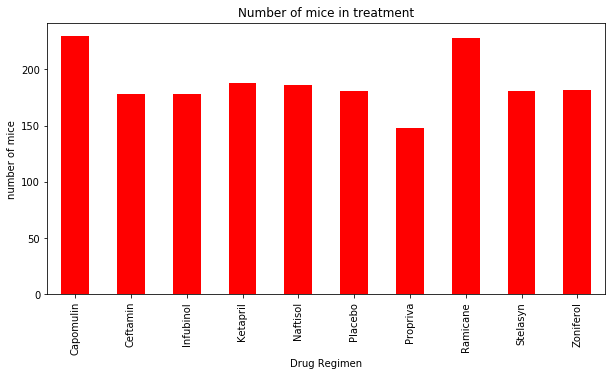

In [25]:
count_mice = count_mice.plot(kind = 'bar', figsize = (10,5), facecolor ='red', title ='Number of mice in treatment')
count_mice.set_ylabel('number of mice')

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice = (study_of_mouse.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

mice

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

<BarContainer object of 10 artists>

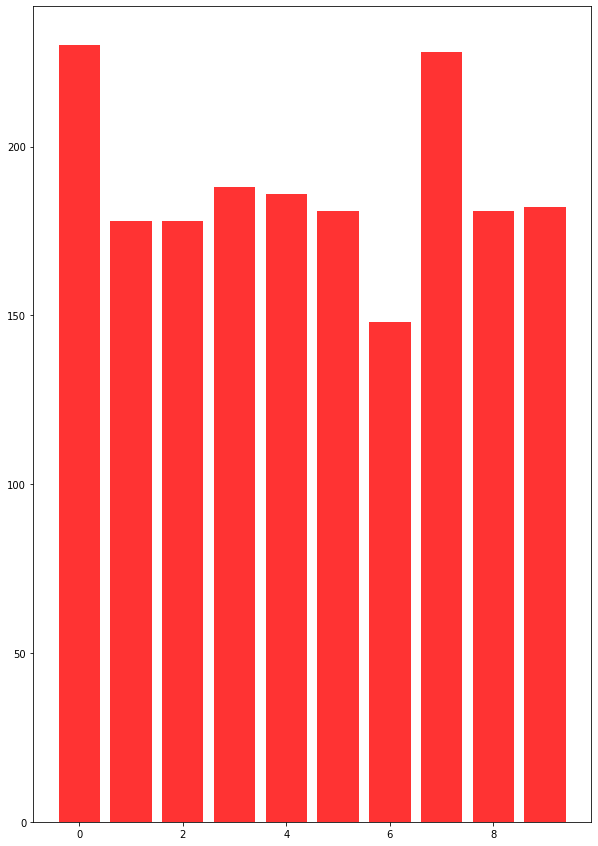

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x_axis = np.arange (len(mice_treatmentall))
fig1, ax1 = plt.subplots(figsize=(10,15))
plt.bar(x_axis, mice, color ='red', alpha =0.8, align ='center')
# plt.figure(figsize=(10,5))
# plt.bar(x_axis, mice ["Number of Mice per treatment"], color = 'red', alpha = 0.5)
# plt.title("#mice per treatment")
# drug = 

## Quartiles, Outliers and Boxplots

In [28]:
mice_gender = study_of_mouse[['Mouse ID','Sex']]
mice_gender

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male
...,...,...
1888,z969,Male
1889,z969,Male
1890,z969,Male
1891,z969,Male


In [29]:
group = mice_gender.groupby('Sex')
group

In [30]:
unique_mouse = study_of_mouse['Mouse ID'].nunique()

In [31]:
unique = group['Mouse ID'].nunique()
distribution = unique/unique_mouse *100
distribution

Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64

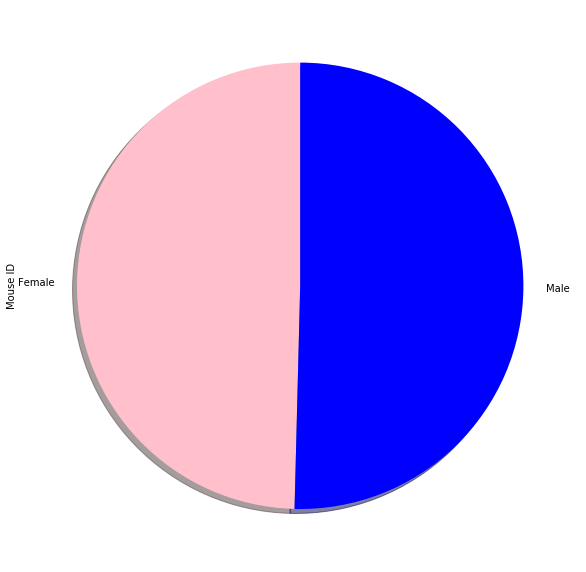

In [32]:
plt.figure(figsize=(10,15))
color =['pink', 'blue']
pie = distribution.plot(kind='pie', colors = color, fontsize = 10, startangle = 90, shadow = True)
plt.show()

In [33]:
study_of_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
new_study_of_mouse = study_of_mouse[study_of_mouse["Drug Regimen"].isin(treatment_regimens)]

new_study_of_mouse
# Start by getting the last (greatest) timepoint for each mouse
last_group = new_study_of_mouse.groupby(['Mouse ID','Drug Regimen'])
last = last_group['Timepoint'].max()
last_timepoint = pd.DataFrame({"Final": last})

last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,,Final
Mouse ID,Drug Regimen,
a203,Infubinol,45
a251,Infubinol,45
a275,Ceftamin,45
a411,Ramicane,45
a444,Ramicane,45
...,...,...
y769,Ceftamin,45
y793,Capomulin,45
y865,Ceftamin,45


In [40]:
drug_frame = pd.merge(last_timepoint, new_study_of_mouse, on ='Mouse ID', how = "outer")

In [42]:
last_tumor_treatment = drug_frame.drop_duplicates(subset =['Mouse ID','Final'], keep = 'last')

In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = last_tumor_treatment['Drug Regimen'].unique()
treatment_list


array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [64]:
tumor_vol = {}
volume_Data = pd.DataFrame(columns = ["Treatment", "Q1", "Q2", "IQR", "Lower Bound", "Upper bound"])  
volume_Data

,Treatment,Q1,Q2,IQR,Lower Bound,Upper bound


In [71]:
# Create empty list to fill with tumor vol data (for plotting)

for drug in treatment_list:
    tumor_vol[drug] = None
    regimen = last_tumor_treatment[last_tumor_treatment['Drug Regimen'] == drug]
    tumor = regimen ["Tumor Volume (mm3)"]
    quartiles = tumor.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]    

In [78]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
    # Locate the rows which contain mice on each drug and get the tumor volumes
for volume in tumor:
    if (volume < lower) | (volume> upper):
        tumor_vol[drug] = volume
        
    data = {"Treatment": drug, "Q1": Q1, "Q3": Q3, "IQR": IQR, "Lower Bound": lower, "Upper bound":upper}
    volume_Data = volume_Data.append(data, ignore_index = True)

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outliers = pd.DataFrame({"outliers": tumor_vol})


In [79]:
outliers

,outliers
Capomulin,None
Ceftamin,None
Infubinol,None
Ramicane,None


In [76]:
volume_Data.head()

,Treatment,Q1,Q2,IQR,Lower Bound,Upper bound,Q3
0,Capomulin,32.377357,NaN,7.781863,20.704562,51.832015,40.15922
1,Capomulin,32.377357,NaN,7.781863,20.704562,51.832015,40.15922
2,Capomulin,32.377357,NaN,7.781863,20.704562,51.832015,40.15922
3,Capomulin,32.377357,NaN,7.781863,20.704562,51.832015,40.15922
4,Capomulin,32.377357,NaN,7.781863,20.704562,51.832015,40.15922


In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = last_tumor_treatment[last_tumor_treatment["Drug Regimen"] == 'Capomulin']
capomulin_tumor = capomulin ['Tumor Volume (mm3)']

ramicane = last_tumor_treatment[last_tumor_treatment["Drug Regimen"] == 'ramicane']
ramicane_tumor = ramicane ['Tumor Volume (mm3)']

infubinol = last_tumor_treatment[last_tumor_treatment["Drug Regimen"] == 'infubinol']
infubinol_tumor = infubinol ['Tumor Volume (mm3)']

ceftamin = last_tumor_treatment[last_tumor_treatment["Drug Regimen"] == 'ceftamin']
ceftamin_tumor = ceftamin ['Tumor Volume (mm3)']

In [86]:
plotting = [capomulin_tumor, ramicane_tumor,infubinol_tumor, ceftamin_tumor]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

/Users/ginacanales/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(*args, **kw)>

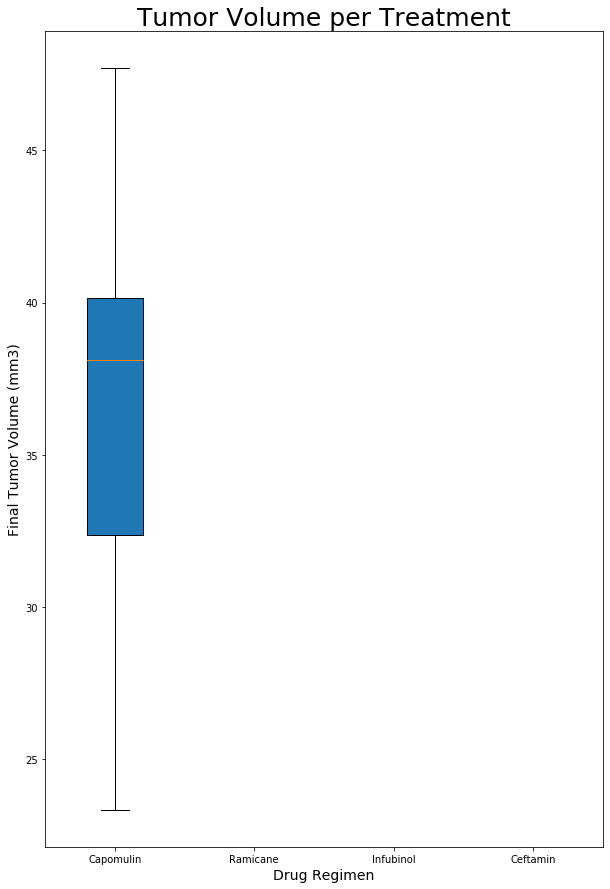

In [90]:
plt.subplots(figsize =(10,15))
plt.title ("Tumor Volume per Treatment", fontsize = 25)
plt.ylabel("Final Tumor Volume (mm3)", fontsize = 14)
plt.xlabel ("Drug Regimen", fontsize = 14)
plt.boxplot(plotting, labels = regimen, widths = 0.4, patch_artist = True, vert = True)
plt.show

## Line and Scatter Plots

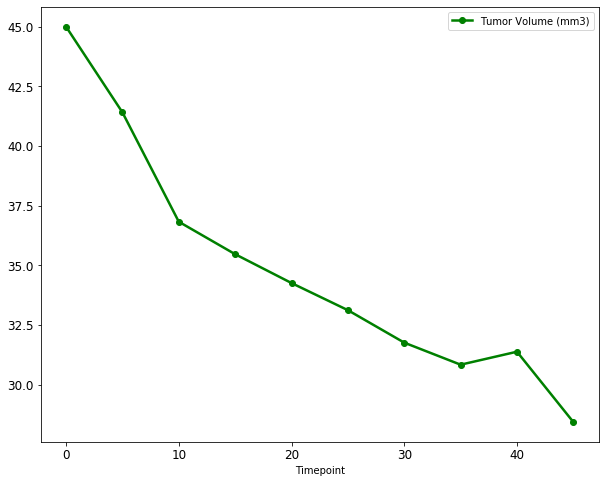

In [97]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_lineplot = study_of_mouse[study_of_mouse["Drug Regimen"]== 'Capomulin']
cap_lineplot

Mouse = "m601"

mouse_capo = cap_lineplot.loc[cap_lineplot['Mouse ID'] == Mouse]
mouse_line = mouse_capo.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
mouse_line.set_index("Timepoint").plot(figsize =(10,8), linewidth =2.5, marker ='o', color ='green', fontsize = 12)


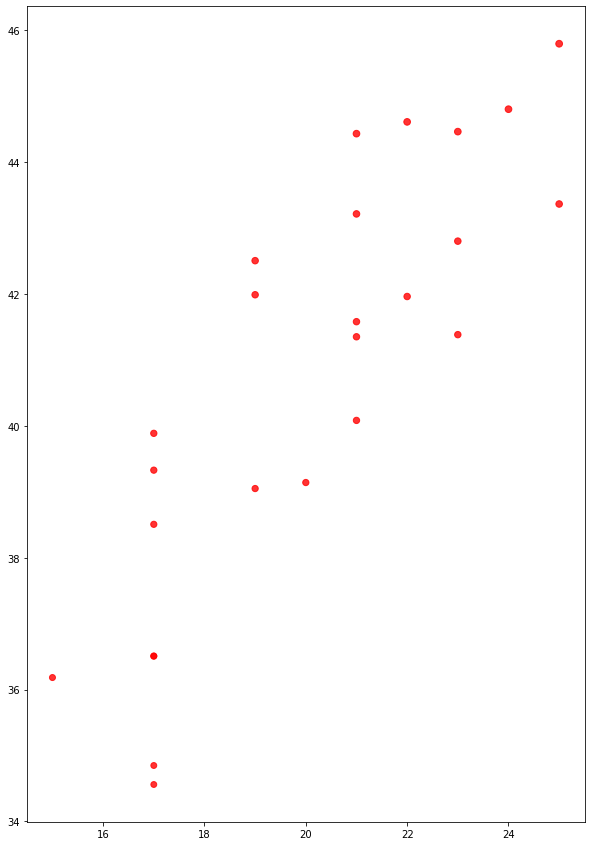

In [106]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_scatter = cap_lineplot[['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
tumor_scatter_group = tumor_scatter.groupby(['Mouse ID', 'Weight (g)'])
average = tumor_scatter_group["Tumor Volume (mm3)"].mean()
tumor_avg = pd.DataFrame({"Tumor Average": average}).reset_index()

x_values = tumor_avg['Weight (g)']
y_values = tumor_avg['Tumor Average']
plt.figure(figsize=(10,15))
plt.scatter(x_values, y_values, facecolors="red", alpha=0.8, s=y_values)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [107]:
tumor_avg

,Mouse ID,Weight (g),Tumor Average
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [110]:
weight = tumor_avg['Weight (g)']
tumor_p = tumor_avg['Tumor Average']
correlation = st.pearsonr(weight, tumor_p)
correlation

(0.8419363424694716, 1.3225722434712883e-07)

In [115]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
line_eq = "y =" + str(round(slope,2))+ "x"+ str(round(intercept,2))

NameError: name 'regression' is not defined

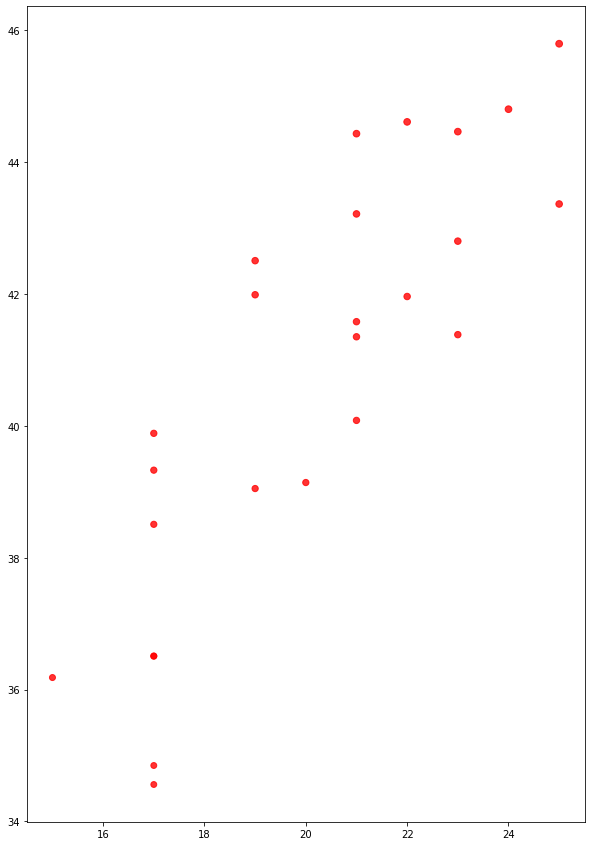

In [116]:
plt.figure(figsize =(10,15))
plt.scatter(x_values, y_values, facecolors="red", alpha=0.8, s=y_values)

plt.plot(x_values, regression,'red')
plt.annotate(line_eq, (10, 15), fontsize =15, color = "yellow")
plt.xlabel('Mouse Weight (g)')
plt.xlabel('Tumor Average (mm3)')

In [ ]:
The End.